<a href="https://colab.research.google.com/github/Ayah1234/Histo/blob/Ayah1234-patch-1/BHI_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from PIL import Image
from skimage.io import imread
from os import listdir
import os


In [ ]:
BHI_path = '/content/gdrive/My Drive/Kaggle_dataset/IDC_regular_ps50_idx5/'

# **Find Number of patients**

In [ ]:
BHI_Folder = listdir(BHI_path)
number_of_patients = len(BHI_Folder)
number_of_patients 

279

In [ ]:
patient_id = BHI_Folder[0]
patient_id 

'9382'

In [ ]:
total_images = 0
for p in range(len(BHI_Folder)):
  patient_id = BHI_Folder[p]
  patient_path = BHI_path + patient_id + "/"
  for c in [0,1]:
      class_path = patient_path + "/" + str(c)
      patient_folder = listdir(class_path)
      total_images += len(patient_folder) 



In [ ]:
total_images 

277524

# **Save to dataFrame**

In [ ]:
data = pd.DataFrame(index=np.arange(0, total_images), columns=["patient_id", "path", "label"])
k = 0
for n in range(len(BHI_Folder)):
    patient_id = BHI_Folder[n]
    patient_path = BHI_path + patient_id 
    for c in [0,1]:
        class_path = patient_path + "/" + str(c) + "/"
        subfiles = listdir(class_path)
        for m in range(len(subfiles)):
            image_path = subfiles[m]
            data.iloc[k]["path"] = class_path + image_path
            data.iloc[k]["label"] = c
            data.iloc[k]["patient_id"] = patient_id
            k += 1  

,patient_id,path,label
0,9382,/content/gdrive/My Drive/Kaggle_dataset/IDC_re...,0
1,9382,/content/gdrive/My Drive/Kaggle_dataset/IDC_re...,0
2,9382,/content/gdrive/My Drive/Kaggle_dataset/IDC_re...,0
3,9382,/content/gdrive/My Drive/Kaggle_dataset/IDC_re...,0
4,9382,/content/gdrive/My Drive/Kaggle_dataset/IDC_re...,0


In [ ]:
data.head()

,patient_id,path,label
0,9382,/content/gdrive/My Drive/Kaggle_dataset/IDC_re...,0
1,9382,/content/gdrive/My Drive/Kaggle_dataset/IDC_re...,0
2,9382,/content/gdrive/My Drive/Kaggle_dataset/IDC_re...,0
3,9382,/content/gdrive/My Drive/Kaggle_dataset/IDC_re...,0
4,9382,/content/gdrive/My Drive/Kaggle_dataset/IDC_re...,0


# **Save the dataframe as "data.csv"**

In [ ]:
data.to_csv('data.csv')
!cp data.csv "/content/gdrive/My Drive/Kaggle_dataset/"

# **Read data.csv**

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/Kaggle_dataset/data.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


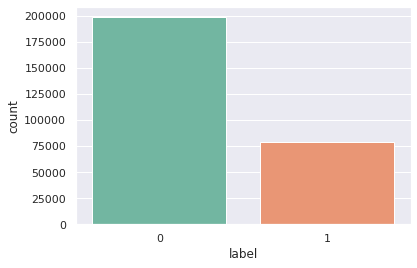

In [ ]:
sns.countplot(data.label, palette="Set2");

# **Plot some Malignant images (+)**

In [ ]:
M = np.random.choice(data[data.label==1].index.values, size=10, replace= False)
B = np.random.choice(data[data.label==0].index.values, size=10, replace= False)

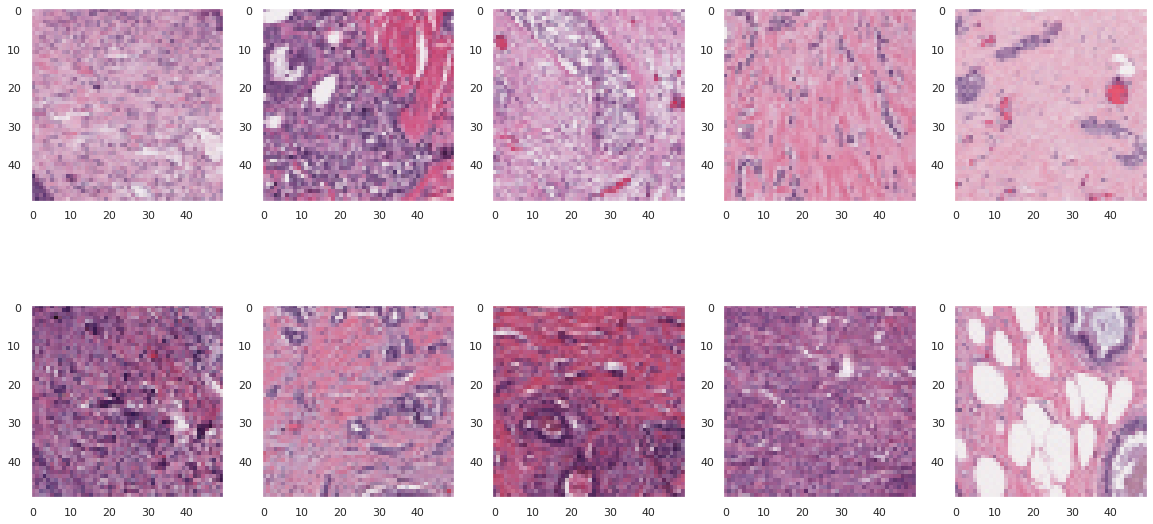

In [ ]:
fig, ax = plt.subplots(2,5, figsize=(20,10))
k=0
for i in range(2):
  for j in range(5):
    indx = M[k]
    im = imread(data.loc[indx,'path'])
    ax[i][j].imshow(im) 
    ax[i][j].grid(False)
    k+=1


# **Plot some Benign images (-)**

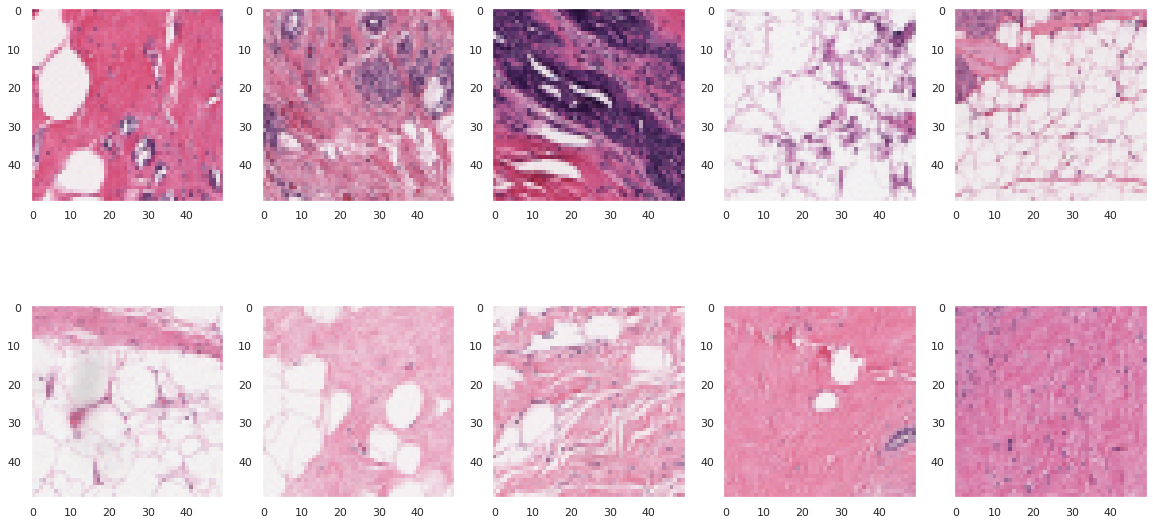

In [ ]:
fig, ax = plt.subplots(2,5, figsize=(20,10))
k=0
for i in range(2):
  for j in range(5):
    indx = B[k]
    im = imread(data.loc[indx,'path'])
    ax[i][j].imshow(im) 
    ax[i][j].grid(False)
    k+=1